In [47]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

## Clustering

In [48]:
country_codes = ['TUR','GHA','IND']
ind1=["EN.ATM.CO2E.KT"]  # C02 Emission
ind2=["EN.ATM.NOXE.KT.CE"]  # Nitrus Oxide Emission

In [49]:
df1  = wb.data.DataFrame(ind1, country_codes, mrv=20).T
df1=df1.fillna(df1.mean())
df1.head()

economy,GHA,IND,TUR
YR1999,6580.0,904090.0,192870.0
YR2000,5740.0,940170.0,216620.0
YR2001,6210.0,953880.0,197780.0
YR2002,7420.0,987530.0,208120.0
YR2003,7130.0,1015890.0,219160.0


In [50]:
df2  = wb.data.DataFrame(ind2, country_codes, mrv=20).T
df2=df2.fillna(df2.mean())
df2.head()

economy,GHA,IND,TUR
YR1999,4120.0,182970.0,28080.0
YR2000,4750.0,180770.0,27620.0
YR2001,4200.0,185000.0,25020.0
YR2002,4160.0,179100.0,25360.0
YR2003,4540.0,186410.0,26220.0


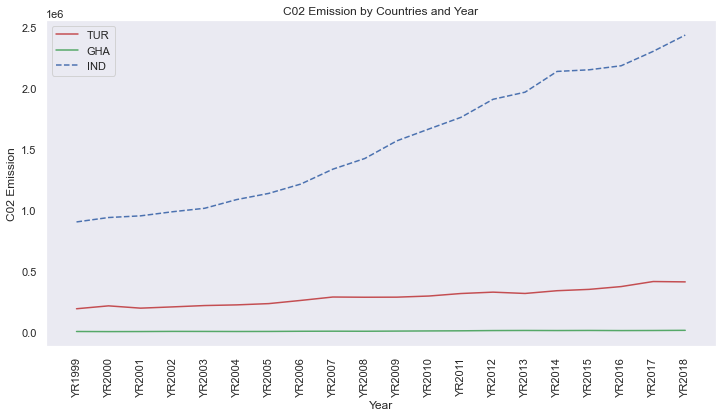

In [51]:
plt.figure(figsize=(12,6))
plt.title('C02 Emission by Countries and Year')
plt.plot(df1['TUR'],"r-",label="TUR")
plt.plot(df1['GHA'],"g-",label="GHA")
plt.plot(df1['IND'],"b--",label="IND")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("C02 Emission")
plt.legend(loc="upper left")
plt.grid()
plt.show()

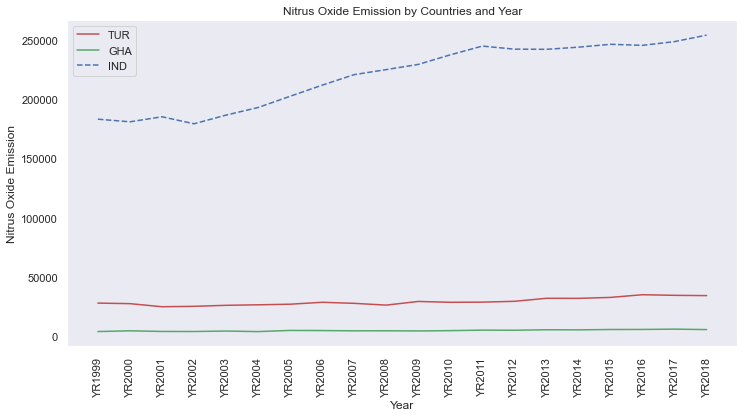

In [52]:
plt.figure(figsize=(12,6))
plt.title('Nitrus Oxide Emission by Countries and Year')
plt.plot(df2['TUR'],"r-",label="TUR")
plt.plot(df2['GHA'],"g-",label="GHA")
plt.plot(df2['IND'],"b--",label="IND")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Nitrus Oxide Emission")
plt.grid()
plt.legend(loc="best")
plt.show()

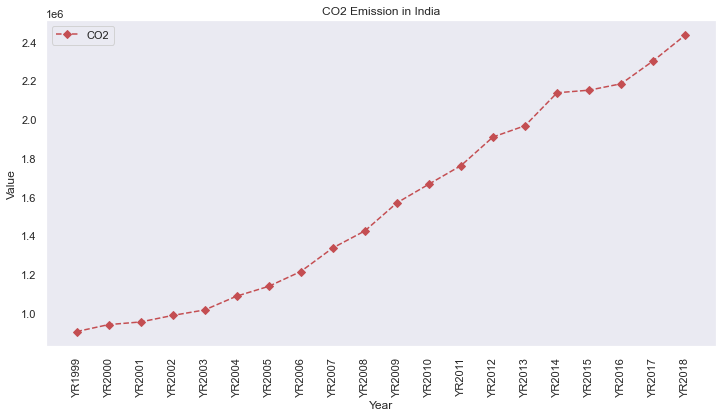

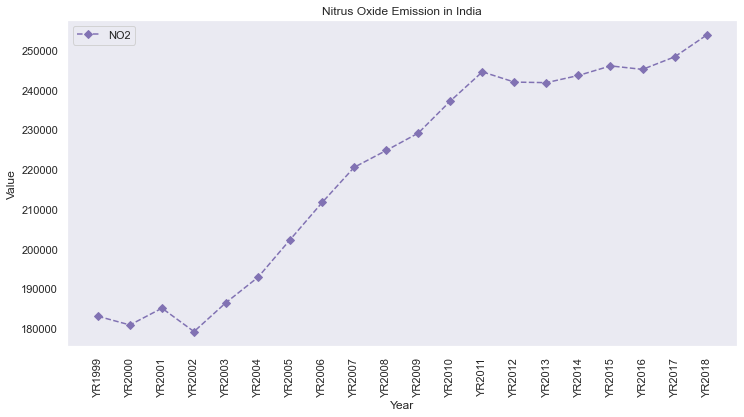

In [53]:
plt.figure(figsize=(12,6))
plt.title('CO2 Emission in India')
plt.plot(df1['IND'],"rD--",label="CO2")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.legend(loc="upper left")
plt.grid()
plt.show()
plt.figure(figsize=(12,6))
plt.title('Nitrus Oxide Emission in India')
plt.plot(df2['IND'],"mD--",label="NO2")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [54]:
def normlz(data):
    nm=normalize(data)
    return nm
data=normlz(df1.values)
data[:20]

array([[0.00711769, 0.97796862, 0.20863057],
       [0.0059493 , 0.97445163, 0.22451866],
       [0.00637454, 0.97915377, 0.20302033],
       [0.007352  , 0.97847958, 0.20621264],
       [0.00686048, 0.97748882, 0.21087564],
       [0.00596307, 0.97930299, 0.20231188],
       [0.00604246, 0.97930815, 0.20228454],
       [0.00678727, 0.97763225, 0.21021207],
       [0.00662023, 0.97738013, 0.21138652],
       [0.00589296, 0.98024142, 0.19771704],
       [0.00623922, 0.9835578 , 0.18048583],
       [0.00659122, 0.98443245, 0.17563971],
       [0.00682399, 0.9840847 , 0.17756894],
       [0.00734219, 0.98544944, 0.16981018],
       [0.00753349, 0.98713863, 0.15968899],
       [0.00664079, 0.98750948, 0.1574196 ],
       [0.0069441 , 0.98687011, 0.16136659],
       [0.00636955, 0.98557869, 0.16909783],
       [0.00631958, 0.98404112, 0.17782897],
       [0.00652398, 0.98589492, 0.16723832]])

In [55]:
aggl = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
yhat = aggl.fit_predict(data)
clusters = np.unique(yhat)
clusters

array([0, 1, 2], dtype=int64)

No handles with labels found to put in legend.


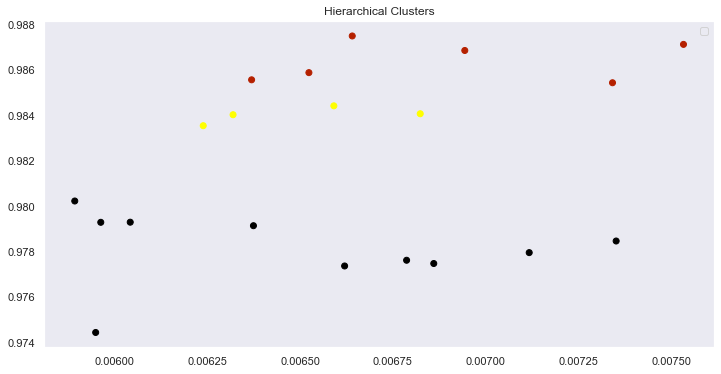

In [56]:
plt.figure(figsize=(12,6))
plt.title('Hierarchical Clusters')
plt.scatter(data[:,0],data[:,1], c=aggl.labels_, cmap='gnuplot')
plt.grid()
plt.legend()
plt.show()

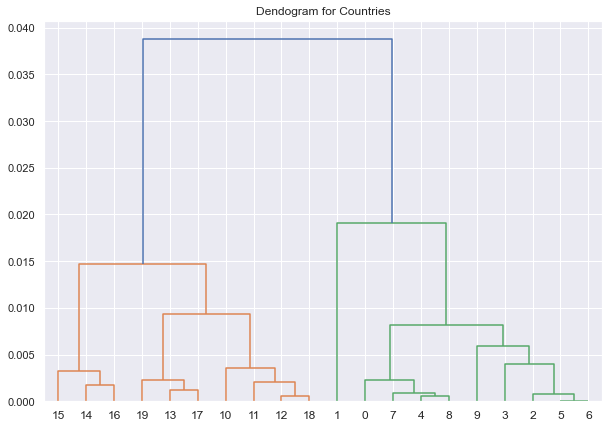

In [57]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram for Countries")
dend = shc.dendrogram(shc.linkage(data, method='centroid'))

## Curve Fitting

In [58]:
from scipy.optimize import curve_fit
#!pip install lmfit
from lmfit import Model

In [59]:
def exponen(x, amp, cen, wid):
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

In [60]:
norml = normlz(df2.values)

y = exponen(norml[:,1], 2.7, 0.21, 1.51) + np.random.normal(0, 0.2, norml.shape[0])

init_vals = [1, 0, 1] 
best_vals, covar = curve_fit(exponen, norml[:,1], y, p0=init_vals,maxfev=5000)
gssmodel = Model(exponen)

In [61]:
crvres = gssmodel.fit(y, x=norml[:,1], amp=8, cen=3, wid=1)
crvres

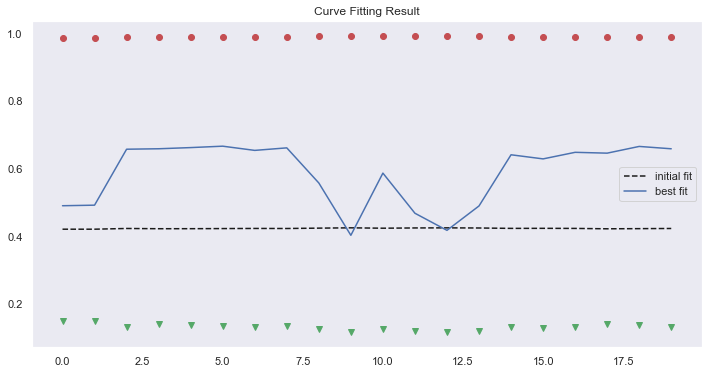

In [62]:
plt.figure(figsize=(12,6))
plt.title('Curve Fitting Result')
plt.plot(norml[:,1],"ro")
plt.plot(norml[:,2],"gv")
plt.plot(crvres.init_fit, 'k--', label='initial fit')
plt.plot(crvres.best_fit, 'b-', label='best fit')
plt.legend()
plt.grid()
plt.show()